In [116]:
import xarray as xr
import pandas as pd
import progressbar
import numpy as np
from oggm.utils import mkdir
import matplotlib.pyplot as plt

In [117]:
%pwd

'/home/www/lschuster/runs/runs_diff_calib_protect'

### GCMs - missing glaciers overview 

In [118]:
dirpath = '/home/www/lschuster/runs_oggm_v16/output'

In [119]:
import os
allfiles = []
for root, dirs, files in os.walk(dirpath):
    for file in files:
        if (file.endswith(".nc")) and ('CMIP6' in file) and ('endyr2100' in file) and ('_0_1000' in file) and ('w5e5_gcm_merged' in file) and ('basin' not in file) and ('bc_2000_2019' in file):
             allfiles.append(os.path.join(root, file))

In [120]:
len(allfiles)

1197

In [121]:
rgi_meta = pd.read_hdf('/home/www/oggm/rgi/rgi62_stats.h5')

In [122]:
rgi_meta = rgi_meta.loc[rgi_meta.Connect != 2]

In [123]:
df_meta = pd.DataFrame()
invalid_per_reg = {}  
meta_per_reg = {}

In [129]:
df_meta = pd.DataFrame()

invalid_per_reg = {}  
meta_per_reg = {}
for f in allfiles: #progressbar.progressbar(allfiles):
    ename = f.replace(dirpath, '')
    ss = ename.split('/')
    #exp = ss[0]
    rgi_reg = ss[1]
    gcm = ss[2].split('_')[7] #ss[2]
    ssp = ss[2].split('_')[8]
    
    end0,end1 = ss[2].split('_')[-2:]
    end = end0+'_'+end1
    ff = f[:-len(end)]+'*'
    if ssp not in ['ssp119', 'ssp126', 'ssp245', 'ssp370', 'ssp585']:
        continue
    
    run_id = f'{exp}:{gcm}:{ssp}:{rgi_reg}'
    df_meta.loc[run_id, 'gcm'] = gcm
    df_meta.loc[run_id, 'ssp'] = ssp
    df_meta.loc[run_id, 'rgi_reg'] = rgi_reg
    df_meta.loc[run_id, 'end_year'] = 0
    df_meta.loc[run_id, 'perc_area_missing'] = 0
    df_meta.loc[run_id, 'fpath'] = ff
    
    if rgi_reg not in invalid_per_reg:
        invalid_per_reg[rgi_reg] = set()
    
    if rgi_reg not in meta_per_reg:
        meta_per_reg[rgi_reg] = rgi_meta.loc[rgi_meta['O1Region'] == rgi_reg[-2:]]
    
    with xr.open_mfdataset(ff) as ds:
        ds_t = ds.isel(time=-1).volume.load()
    df_meta.loc[run_id, 'end_year'] = int(ds_t.time)
    missing_ids = ds_t.rgi_id[ds_t.isnull()].data
    perc = meta_per_reg[rgi_reg].loc[missing_ids]['Area'].sum() / meta_per_reg[rgi_reg]['Area'].sum() 
    df_meta.loc[run_id, 'perc_area_missing'] = perc
    invalid_per_reg[rgi_reg] = invalid_per_reg[rgi_reg].union(missing_ids)

df_meta['exp'] = 'match_geod_pergla'
df_meta['oggm_version'] = 'oggm_v1.6.1'

In [130]:
dds = df_meta.sort_values('perc_area_missing', ascending=False)
dds[dds['perc_area_missing'] > 0.05].rgi_reg.unique()

array(['RGI12'], dtype=object)

In [138]:
dds

gcm     ssp rgi_reg  end_year  \
:NorESM2-MM:ssp126:RGI12    NorESM2-MM  ssp126   RGI12    2100.0   
:NorESM2-MM:ssp370:RGI12    NorESM2-MM  ssp370   RGI12    2100.0   
:INM-CM4-8:ssp585:RGI12      INM-CM4-8  ssp585   RGI12    2100.0   
:GFDL-ESM4:ssp119:RGI12      GFDL-ESM4  ssp119   RGI12    2100.0   
:CAMS-CSM1-0:ssp119:RGI12  CAMS-CSM1-0  ssp119   RGI12    2100.0   
...                                ...     ...     ...       ...   
:INM-CM4-8:ssp126:RGI07      INM-CM4-8  ssp126   RGI07    2100.0   
:INM-CM5-0:ssp126:RGI07      INM-CM5-0  ssp126   RGI07    2100.0   
:GFDL-ESM4:ssp245:RGI07      GFDL-ESM4  ssp245   RGI07    2100.0   
:GFDL-ESM4:ssp370:RGI07      GFDL-ESM4  ssp370   RGI07    2100.0   
:INM-CM4-8:ssp585:RGI07      INM-CM4-8  ssp585   RGI07    2100.0   

                           perc_area_missing  \
:NorESM2-MM:ssp126:RGI12            0.120849   
:NorESM2-MM:ssp370:RGI12            0.119288   
:INM-CM4-8:ssp585:RGI12             0.119279   
:GFDL-ESM4:ssp119:RGI12             0.119279   
:CAMS-CSM1-0:ssp119:RGI12           0.119279   
...                                      ...   
:INM-CM4-8:ssp126:RGI07             0.000000   
:INM-CM5-0:ssp126:RGI07             0.000000   
:GFDL-ESM4:ssp245:RGI07             0.000000   
:GFDL-ESM4:ssp370:RGI07             0.000000   
:INM-CM4-8:ssp585:RGI07             0.000000   

                                                                       fpath  \
:NorESM2-MM:ssp126:RGI12   /home/www/lschuster/runs_oggm_v16/output/RGI12...   
:NorESM2-MM:ssp370:RGI12   /home/www/lschuster/runs_oggm_v16/output/RGI12...   
:INM-CM4-8:ssp585:RGI12    /home/www/lschuster/runs_oggm_v16/output/RGI12...   
:GFDL-ESM4:ssp119:RGI12    /home/www/lschuster/runs_oggm_v16/output/RGI12...   
:CAMS-CSM1-0:ssp119:RGI12  /home/www/lschuster/runs_oggm_v16/output/RGI12...   
...                                                                      ...   
:INM-CM4-8:ssp126:RGI07    /home/www/lschuster/runs_oggm_v16/output/RGI07...   
:INM-CM5-0:ssp126:RGI07    /home/www/lschuster/runs_oggm_v16/output/RGI07...   
:GFDL-ESM4:ssp245:RGI07    /home/www/lschuster/runs_oggm_v16/output/RGI07...   
:GFDL-ESM4:ssp370:RGI07    /home/www/lschuster/runs_oggm_v16/output/RGI07...   
:INM-CM4-8:ssp585:RGI07    /home/www/lschuster/runs_oggm_v16/output/RGI07...   

                                         exp oggm_version  
:NorESM2-MM:ssp126:RGI12   match_geod_pergla  oggm_v1.6.1  
:NorESM2-MM:ssp370:RGI12   match_geod_pergla  oggm_v1.6.1  
:INM-CM4-8:ssp585:RGI12    match_geod_pergla  oggm_v1.6.1  
:GFDL-ESM4:ssp119:RGI12    match_geod_pergla  oggm_v1.6.1  
:CAMS-CSM1-0:ssp119:RGI12  match_geod_pergla  oggm_v1.6.1  
...                                      ...          ...  
:INM-CM4-8:ssp126:RGI07    match_geod_pergla  oggm_v1.6.1  
:INM-CM5-0:ssp126:RGI07    match_geod_pergla  oggm_v1.6.1  
:GFDL-ESM4:ssp245:RGI07    match_geod_pergla  oggm_v1.6.1  
:GFDL-ESM4:ssp370:RGI07    match_geod_pergla  oggm_v1.6.1  
:INM-CM4-8:ssp585:RGI07    match_geod_pergla  oggm_v1.6.1  

[1121 rows x 8 columns]

In [132]:
df_meta.to_csv('output_1.6.1/agg/metadata.csv')

In [133]:
for k, v in invalid_per_reg.items():
    invalid_per_reg[k] = list(v)

In [134]:
import json

In [135]:
with open('output_1.6.1/agg/rgi_ids_missing.json', 'w') as f:
    json.dump(invalid_per_reg, f)

In [136]:
odf = pd.DataFrame()
for rgi_reg, missing_ids in invalid_per_reg.items():
    odf.loc[rgi_reg, 'n_glaciers'] = len(meta_per_reg[rgi_reg])
    odf.loc[rgi_reg, 'n_missing_glaciers'] = len(missing_ids)
    odf.loc[rgi_reg, 'rgi_area'] = meta_per_reg[rgi_reg]['Area'].sum() 
    odf.loc[rgi_reg, 'missing_area'] = meta_per_reg[rgi_reg].loc[missing_ids]['Area'].sum()
    odf.loc[rgi_reg, 'missing_perc'] = odf.loc[rgi_reg, 'missing_area'] / odf.loc[rgi_reg, 'rgi_area']
odf[['n_glaciers', 'n_missing_glaciers']] = odf[['n_glaciers', 'n_missing_glaciers']].astype(int)
odf

n_glaciers  n_missing_glaciers    rgi_area  missing_area  missing_perc
RGI13       54429                 254   49303.415        76.888      0.001559
RGI19        2752                 524  132867.219       249.424      0.001877
RGI07        1615                   0   33958.934         0.000      0.000000
RGI14       27988                  50   33568.298         8.064      0.000240
RGI10        5151                 151    2410.051        88.119      0.036563
RGI03        4556                  31  105110.642        14.465      0.000138
RGI09        1069                   4   51591.600        23.984      0.000465
RGI04        7415                  19   40888.228         3.412      0.000083
RGI17       15908                  58   29429.080        41.940      0.001425
RGI15       13119                  22   14734.204         8.631      0.000586
RGI06         568                   2   11059.700         0.350      0.000032
RGI01       27108                  22   86725.053         8.879      0.000102
RGI18        3537                   1    1161.801         0.052      0.000045
RGI12        1888                 370    1306.992       157.949      0.120849
RGI16        2939                   3    2341.036         0.079      0.000034
RGI05       19306                 116   89717.066        19.159      0.000214
RGI08        3417                   7    2949.103         0.565      0.000192
RGI02       18855                  50   14524.224         2.540      0.000175
RGI11        3927                   6    2092.146         0.369      0.000176

In [137]:
odf.to_csv('output_1.6.1/agg/missing_region_overview.csv')
odf.to_html('output_1.6.1/agg/missing_region_overview.html')

### GCMs - agrregation

In [143]:
base_dir = 'output_1.6.1/agg/'

In [144]:
df_meta.ssp.unique()

array(['ssp370', 'ssp585', 'ssp245', 'ssp119', 'ssp126'], dtype=object)

In [146]:
ds_t

<xarray.DataArray 'volume' (rgi_id: 3927)>
array([     0.     , 167775.86   ,    897.01056, ...,  14845.572  ,
         8186.318  ,  18100.201  ], dtype=float32)
Coordinates:
    time            float64 2.1e+03
  * rgi_id          (rgi_id) object 'RGI60-11.00001' ... 'RGI60-11.03927'
    hydro_year      int64 2100
    hydro_month     int64 4
    calendar_year   int64 2100
    calendar_month  int64 1
Attributes:
    description:  Total glacier volume
    unit:         m 3

In [148]:
from oggm import utils

In [ ]:
for exp in df_meta.exp.unique():
    print(exp, flush=True)
    for rgi_reg in sorted(df_meta.rgi_reg.unique()): #progressbar.progressbar(
        for ssp in sorted(df_meta.ssp.unique()):
            df_meta_s = df_meta.loc[(df_meta.exp == exp) & (df_meta.rgi_reg == rgi_reg) & (df_meta.ssp == ssp)]
            odf_v = pd.DataFrame()
            odf_a = pd.DataFrame()
            ods = []
            gcms = []
            for i, s in df_meta_s.iterrows():
                with xr.open_mfdataset(s.fpath) as ds:
                    ds = ds[['volume', 'area']].load().isel(rgi_id=~ds.rgi_id.isin(invalid_per_reg[s.rgi_reg]))
                    #ds = ds[['volume', 'area', 'length']].load().isel(rgi_id=~ds.rgi_id.isin(invalid_per_reg[s.rgi_reg]))
                    odf_v[s.gcm] = ds.volume.sum(dim='rgi_id').to_series()
                    odf_a[s.gcm] = ds.area.sum(dim='rgi_id').to_series()
                    ods.append(ds)
                    gcms.append(s.gcm)
            ods = xr.concat(ods, 'gcm')
            utils.mkdir(f'output_1.6.1/{exp}/{rgi_reg}/')
            ods.mean(dim='gcm').to_netcdf(f'output_1.6.1/{exp}/{rgi_reg}/all_gcm_avg_{ssp}.nc')
            ods.std(dim='gcm').to_netcdf(f'output_1.6.1/{exp}/{rgi_reg}/all_gcm_std_{ssp}.nc')
            odir = base_dir + f'volume/{exp}/{rgi_reg}/'
            mkdir(odir)
            odf_v.to_csv(odir + f'{ssp}.csv')
            odir = base_dir + f'area/{exp}/{rgi_reg}/'
            mkdir(odir)
            odf_a.to_csv(odir + f'{ssp}.csv')

match_geod_pergla


In [154]:
df_meta

gcm     ssp rgi_reg  end_year  \
:NorESM2-MM:ssp370:RGI13        NorESM2-MM  ssp370   RGI13    2100.0   
:MPI-ESM1-2-HR:ssp370:RGI13  MPI-ESM1-2-HR  ssp370   RGI13    2100.0   
:INM-CM4-8:ssp585:RGI13          INM-CM4-8  ssp585   RGI13    2100.0   
:INM-CM5-0:ssp585:RGI13          INM-CM5-0  ssp585   RGI13    2100.0   
:CAMS-CSM1-0:ssp245:RGI13      CAMS-CSM1-0  ssp245   RGI13    2100.0   
...                                    ...     ...     ...       ...   
:MPI-ESM1-2-HR:ssp245:RGI11  MPI-ESM1-2-HR  ssp245   RGI11    2100.0   
:CAMS-CSM1-0:ssp119:RGI11      CAMS-CSM1-0  ssp119   RGI11    2100.0   
:EC-Earth3:ssp585:RGI11          EC-Earth3  ssp585   RGI11    2100.0   
:BCC-CSM2-MR:ssp585:RGI11      BCC-CSM2-MR  ssp585   RGI11    2100.0   
:CESM2:ssp126:RGI11                  CESM2  ssp126   RGI11    2100.0   

                             perc_area_missing  \
:NorESM2-MM:ssp370:RGI13              0.001324   
:MPI-ESM1-2-HR:ssp370:RGI13           0.001355   
:INM-CM4-8:ssp585:RGI13               0.001329   
:INM-CM5-0:ssp585:RGI13               0.001329   
:CAMS-CSM1-0:ssp245:RGI13             0.001391   
...                                        ...   
:MPI-ESM1-2-HR:ssp245:RGI11           0.000158   
:CAMS-CSM1-0:ssp119:RGI11             0.000176   
:EC-Earth3:ssp585:RGI11               0.000158   
:BCC-CSM2-MR:ssp585:RGI11             0.000158   
:CESM2:ssp126:RGI11                   0.000158   

                                                                         fpath  \
:NorESM2-MM:ssp370:RGI13     /home/www/lschuster/runs_oggm_v16/output/RGI13...   
:MPI-ESM1-2-HR:ssp370:RGI13  /home/www/lschuster/runs_oggm_v16/output/RGI13...   
:INM-CM4-8:ssp585:RGI13      /home/www/lschuster/runs_oggm_v16/output/RGI13...   
:INM-CM5-0:ssp585:RGI13      /home/www/lschuster/runs_oggm_v16/output/RGI13...   
:CAMS-CSM1-0:ssp245:RGI13    /home/www/lschuster/runs_oggm_v16/output/RGI13...   
...                                                                        ...   
:MPI-ESM1-2-HR:ssp245:RGI11  /home/www/lschuster/runs_oggm_v16/output/RGI11...   
:CAMS-CSM1-0:ssp119:RGI11    /home/www/lschuster/runs_oggm_v16/output/RGI11...   
:EC-Earth3:ssp585:RGI11      /home/www/lschuster/runs_oggm_v16/output/RGI11...   
:BCC-CSM2-MR:ssp585:RGI11    /home/www/lschuster/runs_oggm_v16/output/RGI11...   
:CESM2:ssp126:RGI11          /home/www/lschuster/runs_oggm_v16/output/RGI11...   

                                           exp oggm_version  
:NorESM2-MM:ssp370:RGI13     match_geod_pergla  oggm_v1.6.1  
:MPI-ESM1-2-HR:ssp370:RGI13  match_geod_pergla  oggm_v1.6.1  
:INM-CM4-8:ssp585:RGI13      match_geod_pergla  oggm_v1.6.1  
:INM-CM5-0:ssp585:RGI13      match_geod_pergla  oggm_v1.6.1  
:CAMS-CSM1-0:ssp245:RGI13    match_geod_pergla  oggm_v1.6.1  
...                                        ...          ...  
:MPI-ESM1-2-HR:ssp245:RGI11  match_geod_pergla  oggm_v1.6.1  
:CAMS-CSM1-0:ssp119:RGI11    match_geod_pergla  oggm_v1.6.1  
:EC-Earth3:ssp585:RGI11      match_geod_pergla  oggm_v1.6.1  
:BCC-CSM2-MR:ssp585:RGI11    match_geod_pergla  oggm_v1.6.1  
:CESM2:ssp126:RGI11          match_geod_pergla  oggm_v1.6.1  

[1121 rows x 8 columns]

In [156]:
for var in ['volume', 'area']:
    for exp in df_meta.exp.unique():
        odir = base_dir + f'{var}/{exp}/global/'
        mkdir(odir)
        for ssp in sorted(df_meta.ssp.unique()):
            odf = 0
            for rgi_reg in sorted(df_meta.rgi_reg.unique()):
                idir = base_dir + f'{var}/{exp}/{rgi_reg}/'
                df = pd.read_csv(idir + f'/{ssp}.csv', index_col=0)
                odf += df
            odf.to_csv(odir + f'/{ssp}.csv')

**missing glaciers are filled with average glacier statistics from similar-area glaciers of that RGI region:**

In [190]:
fill = False
if fill:
    for exp in df_meta.exp.unique():
        print(exp, flush=True)
        for rgi_reg in sorted(df_meta.rgi_reg.unique()): #progressbar.progressbar(
            for ssp in sorted(df_meta.ssp.unique()):
                df_meta_s = df_meta.loc[(df_meta.exp == exp) & (df_meta.rgi_reg == rgi_reg) & (df_meta.ssp == ssp)]
                odf_v = pd.DataFrame()
                odf_a = pd.DataFrame()
                ods = []
                gcms = []
                for i, s in df_meta_s.iterrows():
                    with xr.open_mfdataset(s.fpath) as ds:
                        ds = ds[['volume', 'area']].load() # .isel(rgi_id=~ds.rgi_id.isin(invalid_per_reg[s.rgi_reg]))
                        ds_sel = ds.dropna(dim='rgi_id', how='all')
                        ds_sel = ds_sel.load()
                    rgi_reg_working = ds_sel.volume.isel(time=0).dropna(dim='rgi_id').rgi_id.values
                    rgi_meta_reg = rgi_meta.loc[rgi_meta['O1Region']==rgi_reg[3:]]
                    bad_rgi = list(set(rgi_meta_reg.index.values).difference(rgi_reg_working))

                    bad = rgi_meta_reg.loc[bad_rgi]  
                    good = rgi_meta_reg.loc[rgi_reg_working]  # working glaciers
                    bad_vs_total_ratio = bad.Area.sum() / (good.Area.sum() + bad.Area.sum())
                    if bad_vs_total_ratio >0.01:
                        print(rgi_reg, ssp, bad_vs_total_ratio)
                    #bad_glacier_count_perc = (len(bad)/len(good))
                    #print('Correcting for {:.2f}% bad area'.format(bad_ratio * 100))
                    assert len(bad)+len(good) == len(rgi_meta_reg.index)

                    # create dummy xarray dataset with empty data for the missing glaciers
                    # that will be filled afterwards
                    ds_dummy = ds_sel.isel(rgi_id=0).load().copy(deep=True)
                    ds_dummy['volume'].data[...] = np.NaN
                    ds_dummy['area'].data[...] = np.NaN
                    #ds_dummy = ds_dummy.drop('rgi_id')
                    #ds_dummy = ds_dummy.expand_dims({'rgi_id':bad.index}).transpose()
                    ds_dummy = ds_dummy.expand_dims({'rgi_id':bad.index.values}).transpose()
                    # NEW: also need to add the coords values -> maybe 
                    ds_dummy.coords['rgi_id'] = bad.index.values
                    # add the dummy xarray dataset to the existing glaciers
                    ds_sel_full = xr.concat([ds_sel, ds_dummy], dim='rgi_id')

                    # Repair the missing glaciers
                    ds_rep_sel = ds_sel_full.copy(deep=True)
                    ds_rep_sel = ds_rep_sel.squeeze()
                    ds_index = ds_rep_sel.rgi_id.data
                    # need to loop over every glacier 
                    for rid, g in bad.iterrows():
                        area_diff = np.abs(good.Area - g.Area) / g.Area
                        # if possible, take all glacers of that RGI region that 
                        # have a smaller relative area difference than 1 %
                        sel = area_diff.loc[area_diff < 0.01]
                        if len(sel) < 3:
                            # if less than 3 glaciers have a similar area,
                            # take instead the 9 area-most similar glaciers
                            sel = area_diff.sort_values().iloc[:9]
                        # Now, we take the average over the selected area-similar glaciers
                        # and add them as fake statistics for that missing glacier
                        # (in our case it is area and volume that  
                        # are estimated for each simulation year like that)
                        new = ds_sel.sel(rgi_id=sel.index).mean(dim='rgi_id').squeeze()
                        rep_id = np.nonzero(ds_index == rid)[0][0]
                        for vn in ds_rep_sel.data_vars:
                            ds_rep_sel[vn].data[...,rep_id] = new[vn].data
                            
                    odf_v[s.gcm] = ds_rep_sel.volume.sum(dim='rgi_id').to_series()
                    odf_a[s.gcm] = ds_rep_sel.area.sum(dim='rgi_id').to_series()
                    ods.append(ds)
                    gcms.append(s.gcm)
                ods = xr.concat(ods, 'gcm')
                utils.mkdir(f'output_1.6.1/{exp}/{rgi_reg}/')
                ods.mean(dim='gcm').to_netcdf(f'output_1.6.1/{exp}/{rgi_reg}/filled_all_gcm_avg_{ssp}.nc')
                ods.std(dim='gcm').to_netcdf(f'output_1.6.1/{exp}/{rgi_reg}/filled_all_gcm_std_{ssp}.nc')
                odir = base_dir + f'volume/{exp}/{rgi_reg}/'
                mkdir(odir)
                odf_v.to_csv(odir + f'filled_{ssp}.csv')
                odir = base_dir + f'area/{exp}/{rgi_reg}/'
                mkdir(odir)
                odf_a.to_csv(odir + f'filled_{ssp}.csv')
                

In [185]:
odir

'output_1.6.1/agg/agg/area/match_geod_pergla/global/'

In [186]:
for var in ['volume', 'area']:
    for exp in df_meta.exp.unique():
        odir = base_dir + f'{var}/{exp}/global/'
        mkdir(odir)
        for ssp in sorted(df_meta.ssp.unique()):
            odf = 0
            for rgi_reg in sorted(df_meta.rgi_reg.unique()):
                idir = base_dir + f'{var}/{exp}/{rgi_reg}/'
                df = pd.read_csv(idir + f'/filled_{ssp}.csv', index_col=0)
                odf += df
            odf.to_csv(odir + f'/filled_{ssp}.csv')

## Compare unfilled, filled and previous OGGM-version

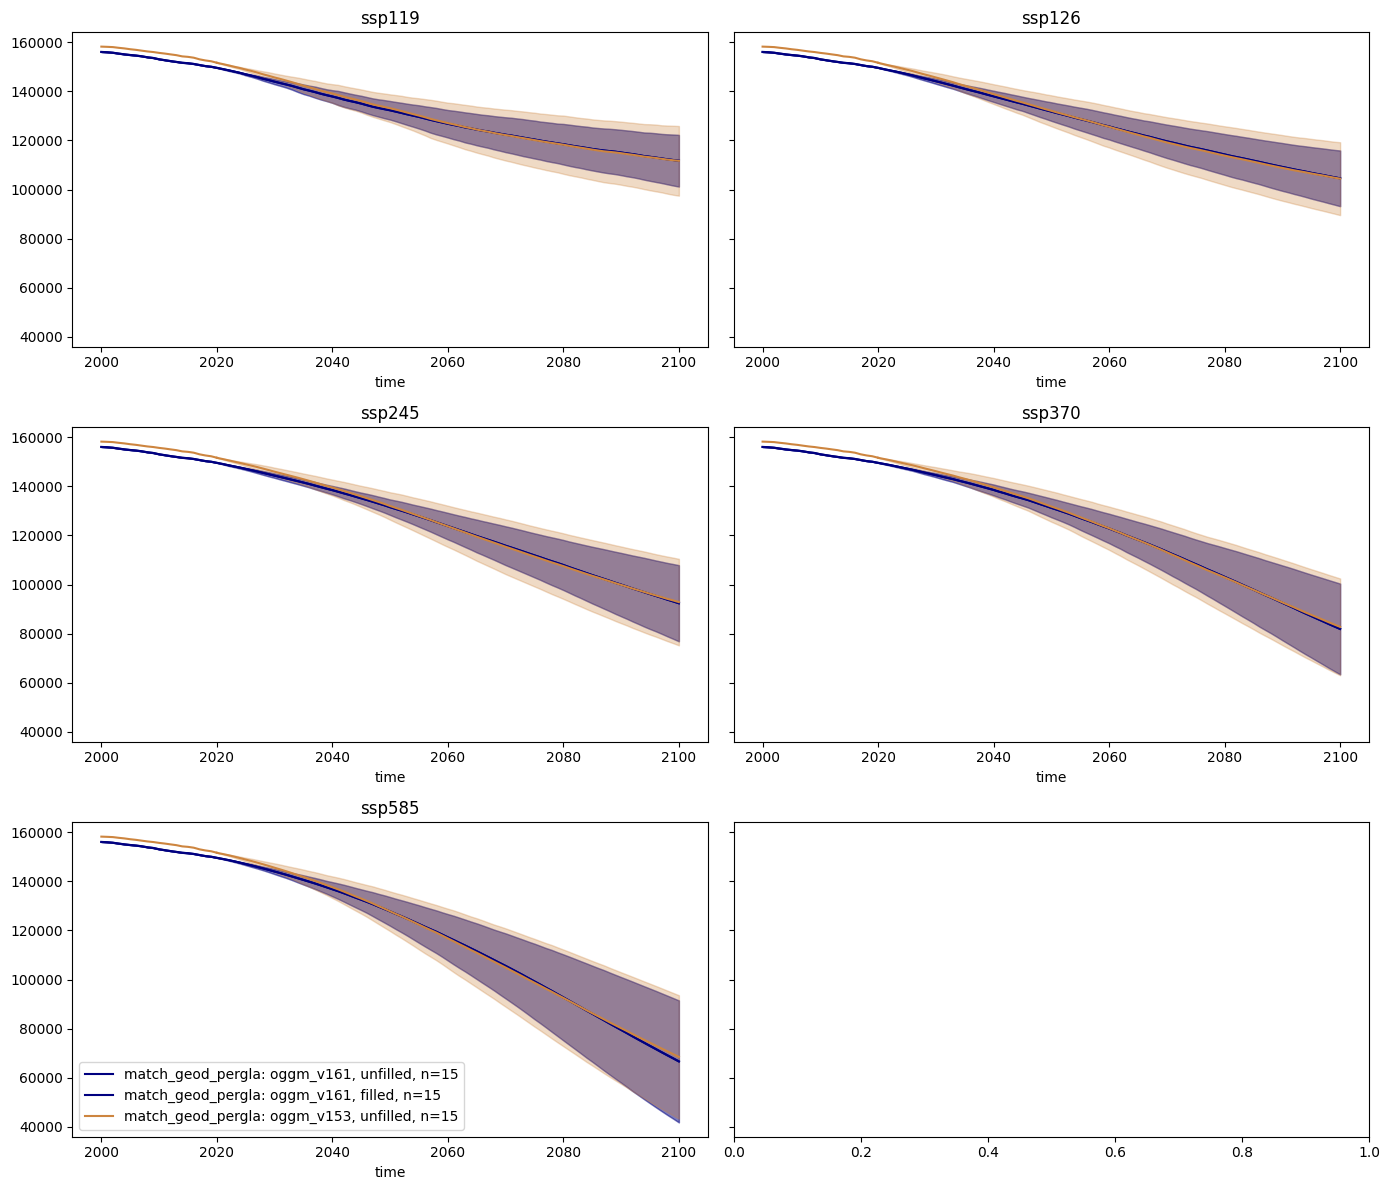

In [188]:
# global plot
f, axs = plt.subplots(3, 2, figsize=(14, 12), sharey=True)
axs = np.array(axs).flatten()
for ssp, ax in zip(sorted(df_meta.ssp.unique()), axs):
    for exp, c in zip(df_meta.exp.unique(), ['navy', 'royalblue', 'peru']):
        idir = base_dir + f'volume/{exp}/global/'
        df = pd.read_csv(idir + f'{ssp}.csv', index_col=0)
        n = len(df.columns)
        avg = df.mean(axis=1) * 1e-9
        std = df.std(axis=1) * 1e-9
        ax.fill_between(avg.index, avg-std, avg+std, alpha=0.3, color=c)
        avg.plot(ax=ax, label=f'{exp}: oggm_v161, unfilled, n={n}', c=c);
        
        idir = base_dir + f'volume/{exp}/global/'
        df = pd.read_csv(idir + f'filled_{ssp}.csv', index_col=0)
        n_f = len(df.columns)
        avg = df.mean(axis=1) * 1e-9
        std = df.std(axis=1) * 1e-9
        ax.fill_between(avg.index, avg-std, avg+std, alpha=0.3, color=c)
        avg.plot(ax=ax, label=f'{exp}: oggm_v161, filled, n={n_f}', c=c);
        
        idir_oggm_v153 = f'/home/www/fmaussion/runs/runs_diff_calib_protect/agg/volume/{exp}/global'
        df = pd.read_csv(idir_oggm_v153 + f'/{ssp}.csv', index_col=0)
        n_v153 = len(df.columns)
        avg = df.mean(axis=1) * 1e-9
        std = df.std(axis=1) * 1e-9
        ax.fill_between(avg.index, avg-std, avg+std, alpha=0.3, color='peru')
        avg.plot(ax=ax, label=f'{exp}: oggm_v153, unfilled, n={n_v153}', c='peru');

        idir_oggm_v153 = f'/home/www/fmaussion/runs/runs_diff_calib_protect/historical/agg/volume/{exp}/'
        df = pd.read_csv(idir_oggm_v153 + f'historical.csv', index_col=0).sum(axis=1).loc[2000:]
        avg = df * 1e-9
        #std = df.std(axis=1) * 1e-9
        #            x.fill_between(avg.index, avg-std, avg+std, alpha=0.3, color='peru')
        avg.plot(ax=ax, c='peru', label=f'{exp}: oggm_v153');
    ax.set_title(ssp)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:-1], labels[:-1]);
plt.tight_layout();

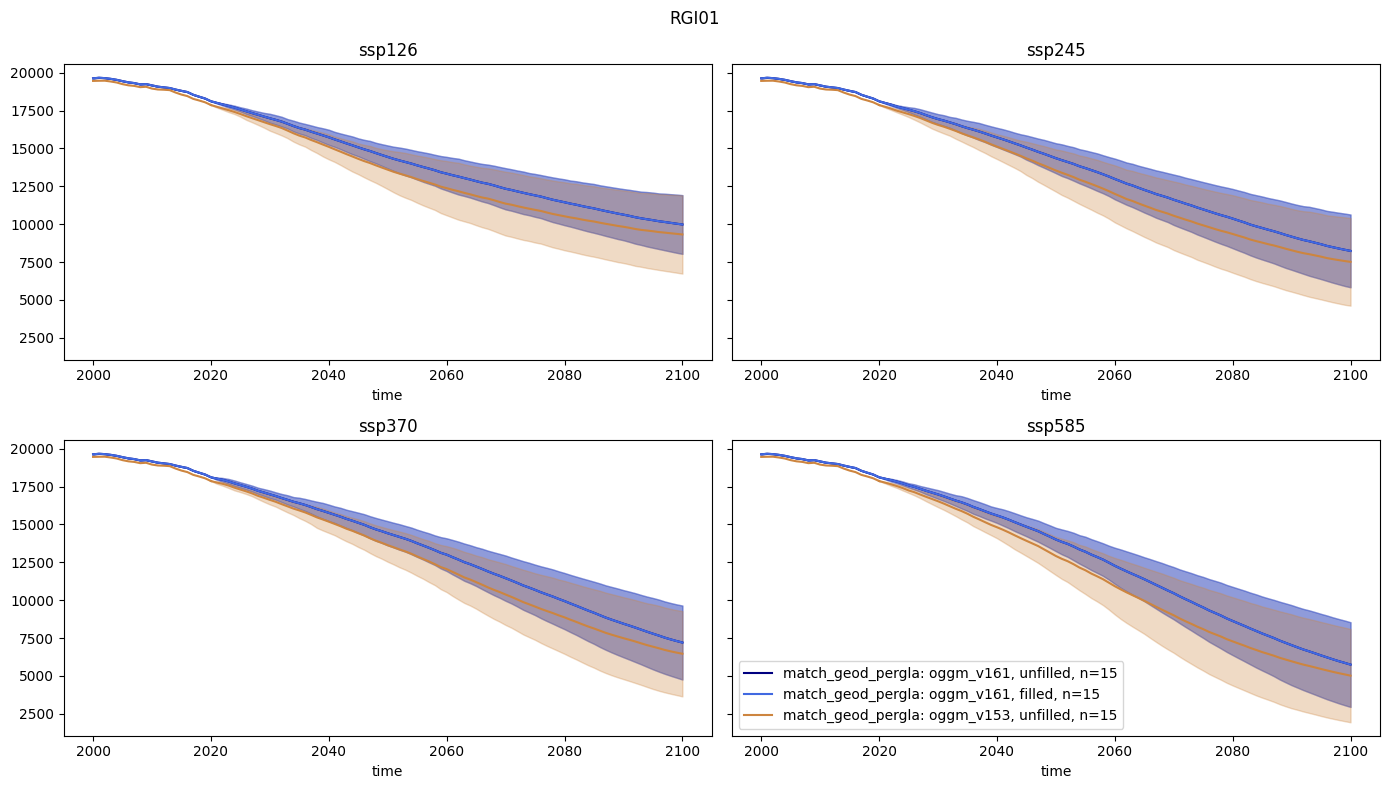

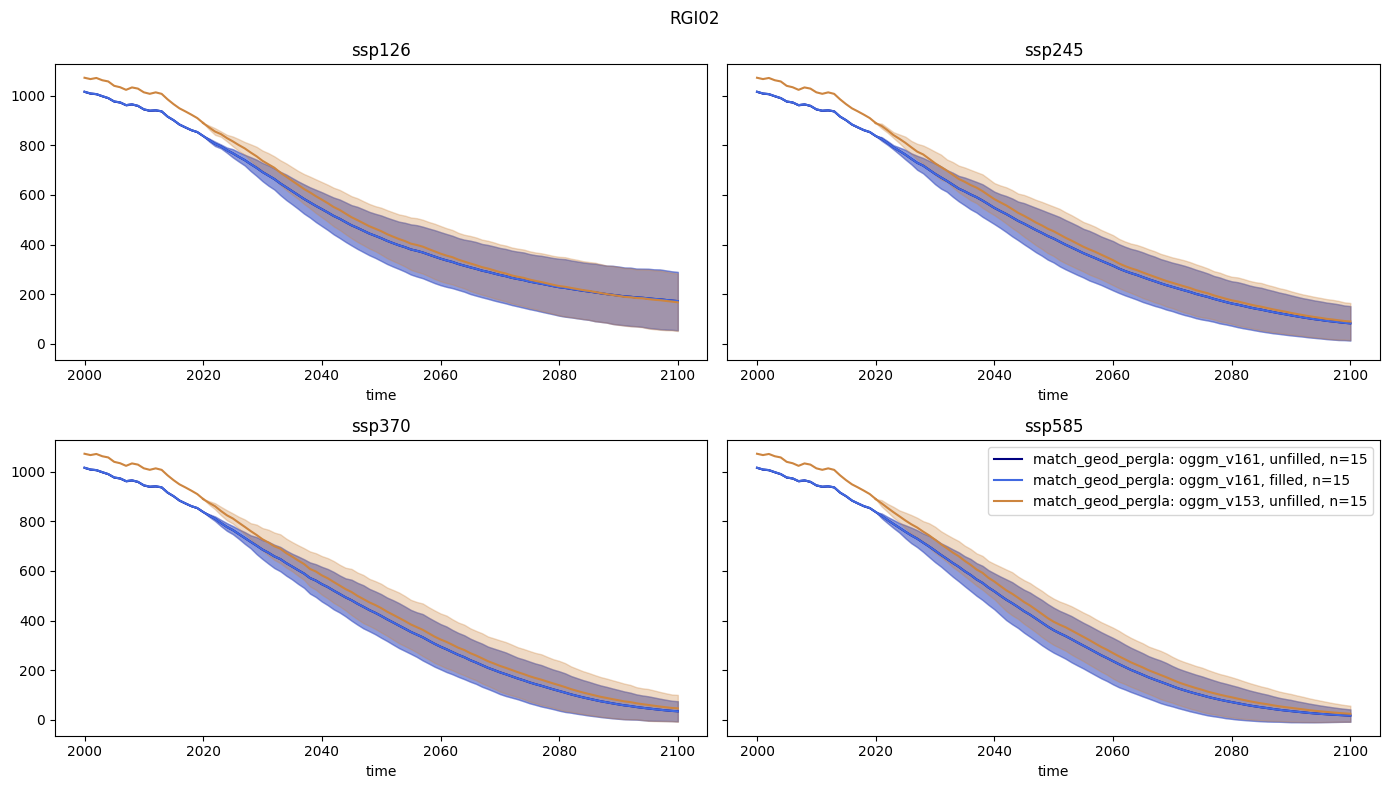

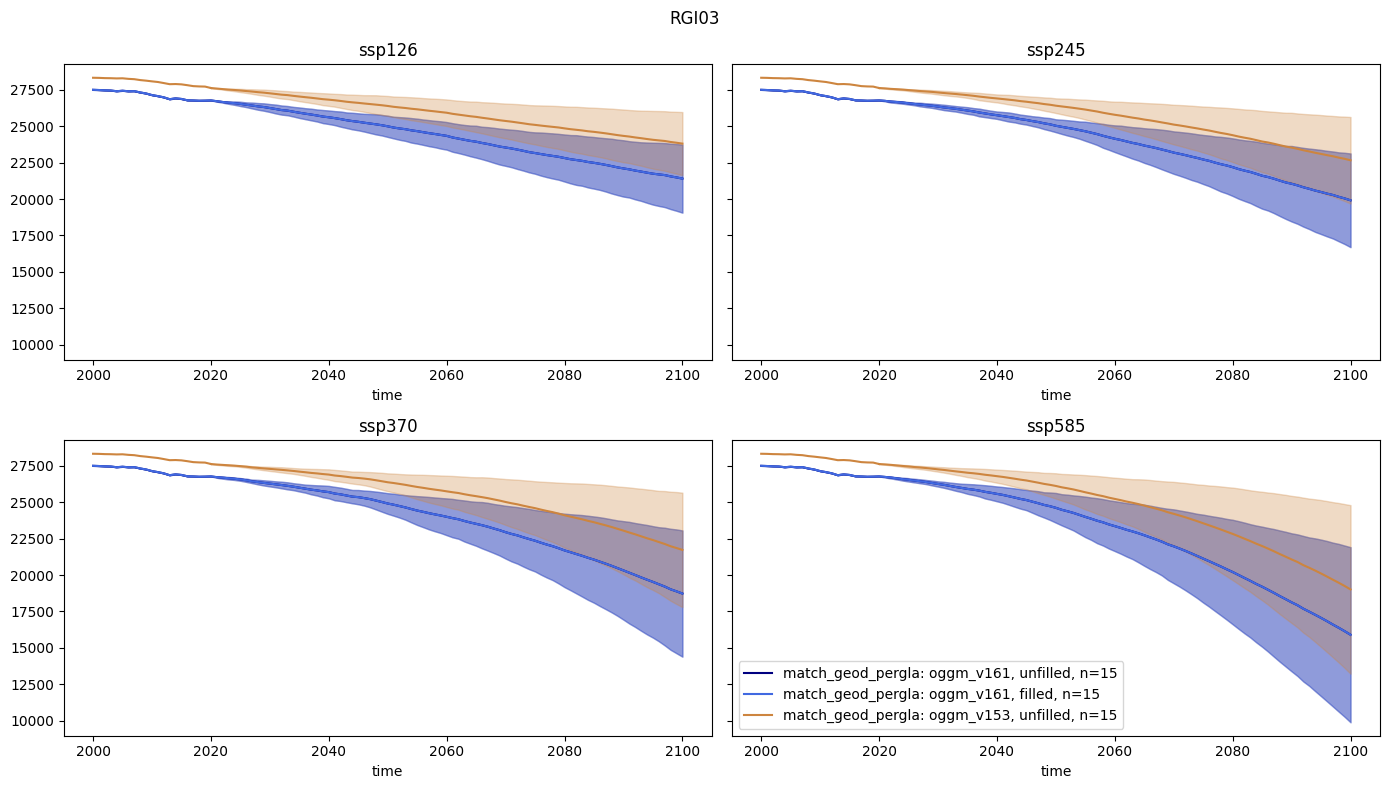

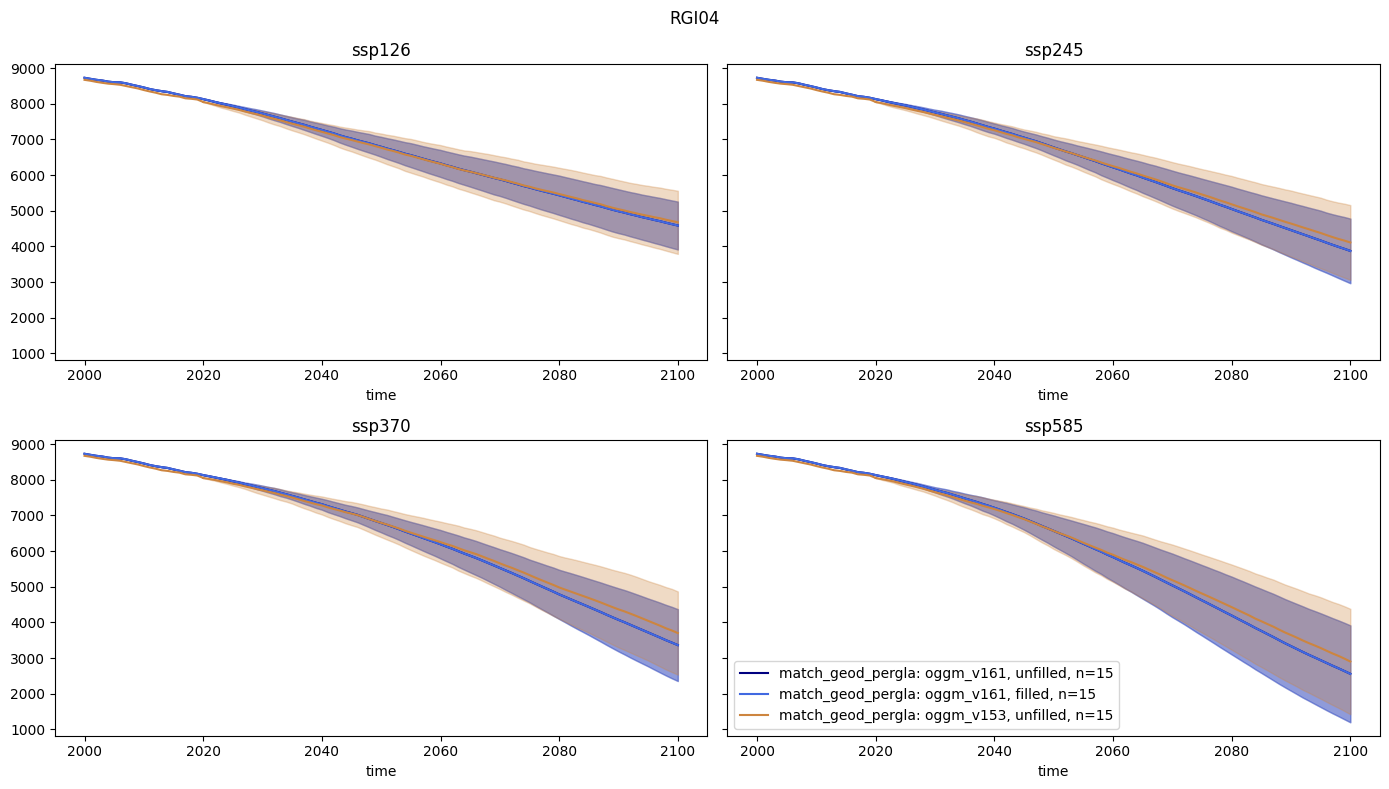

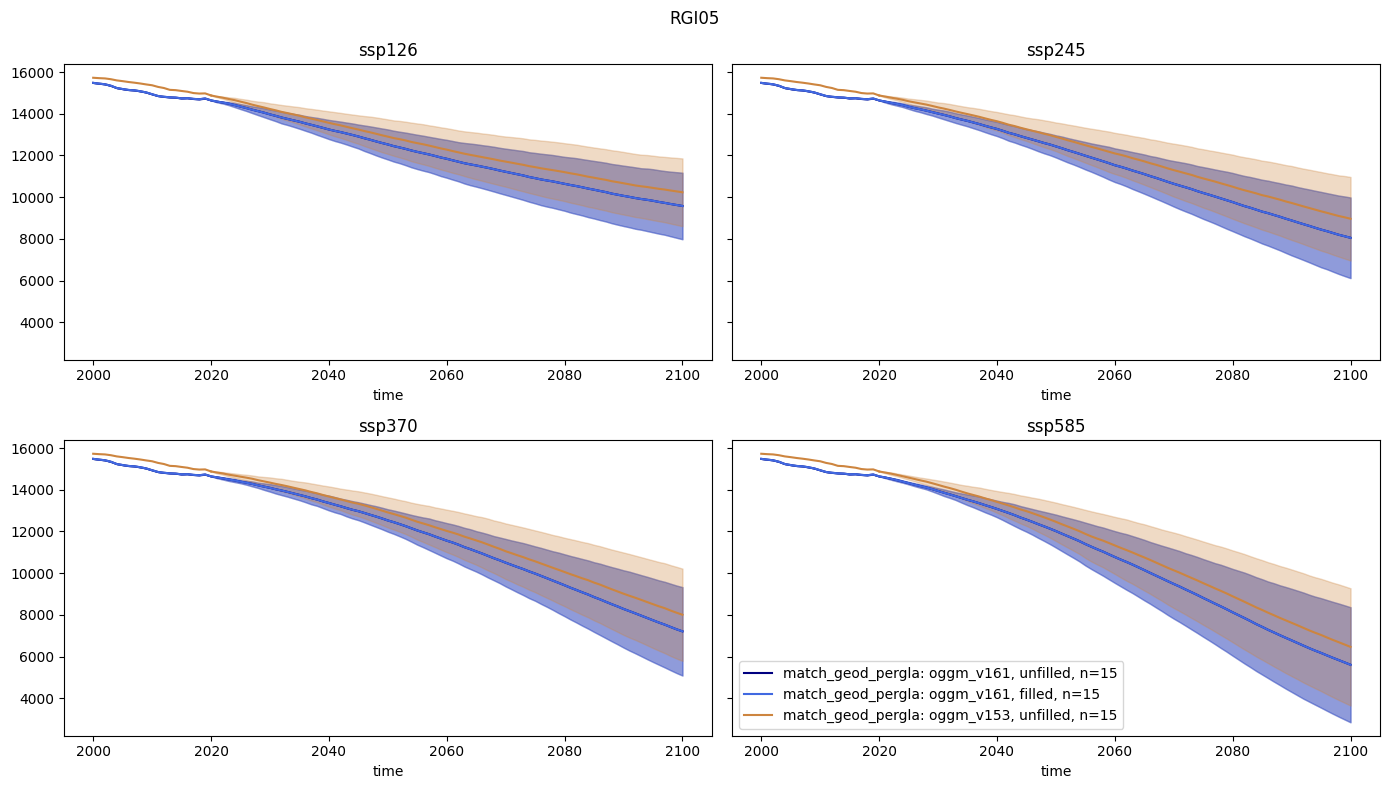

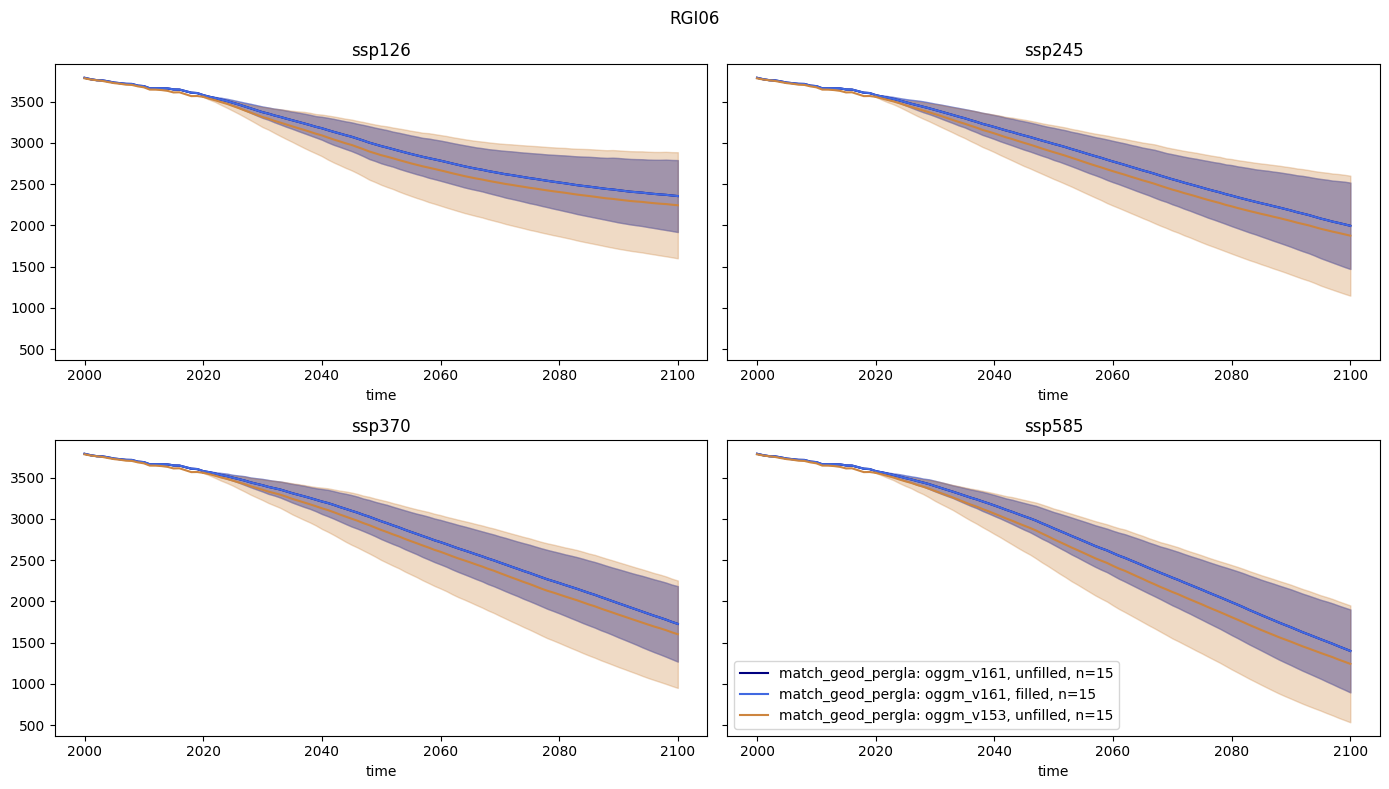

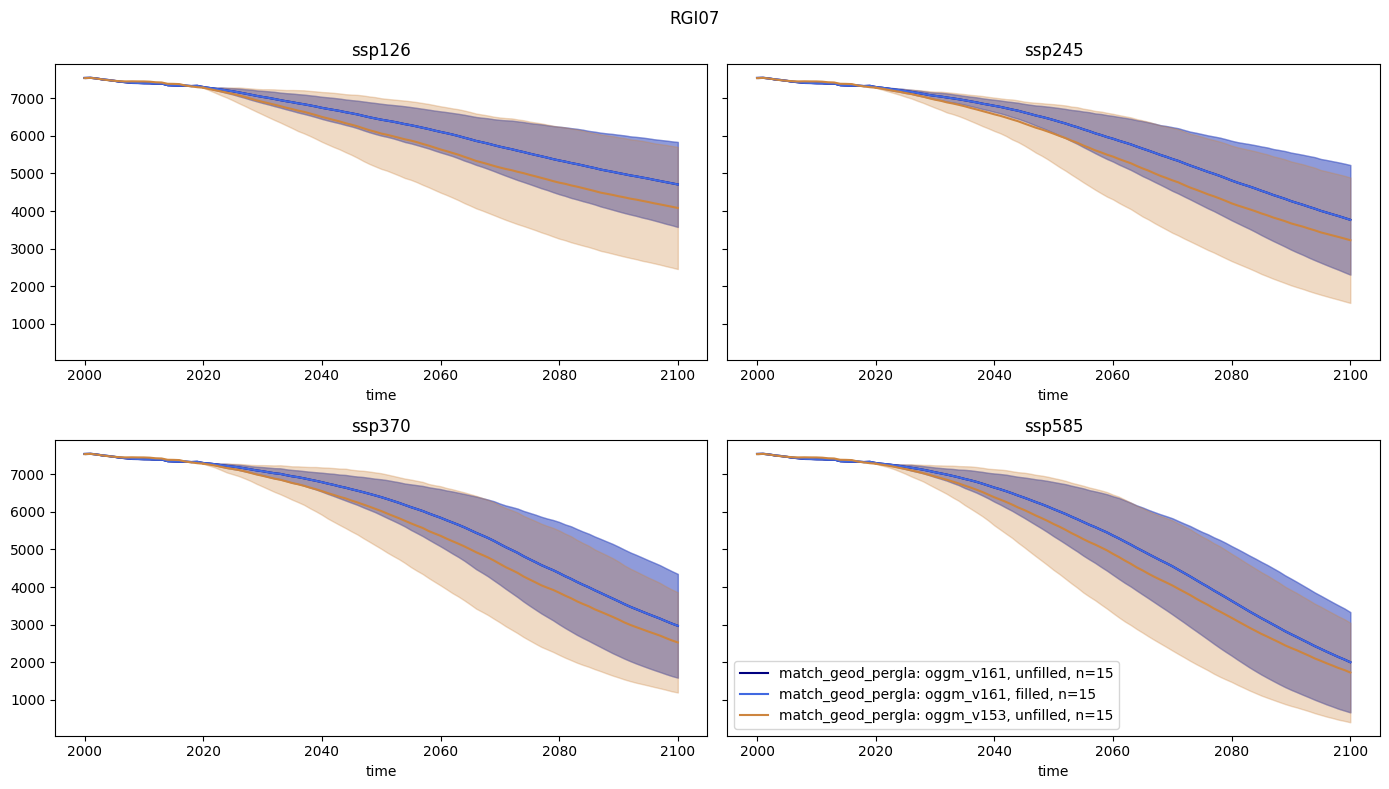

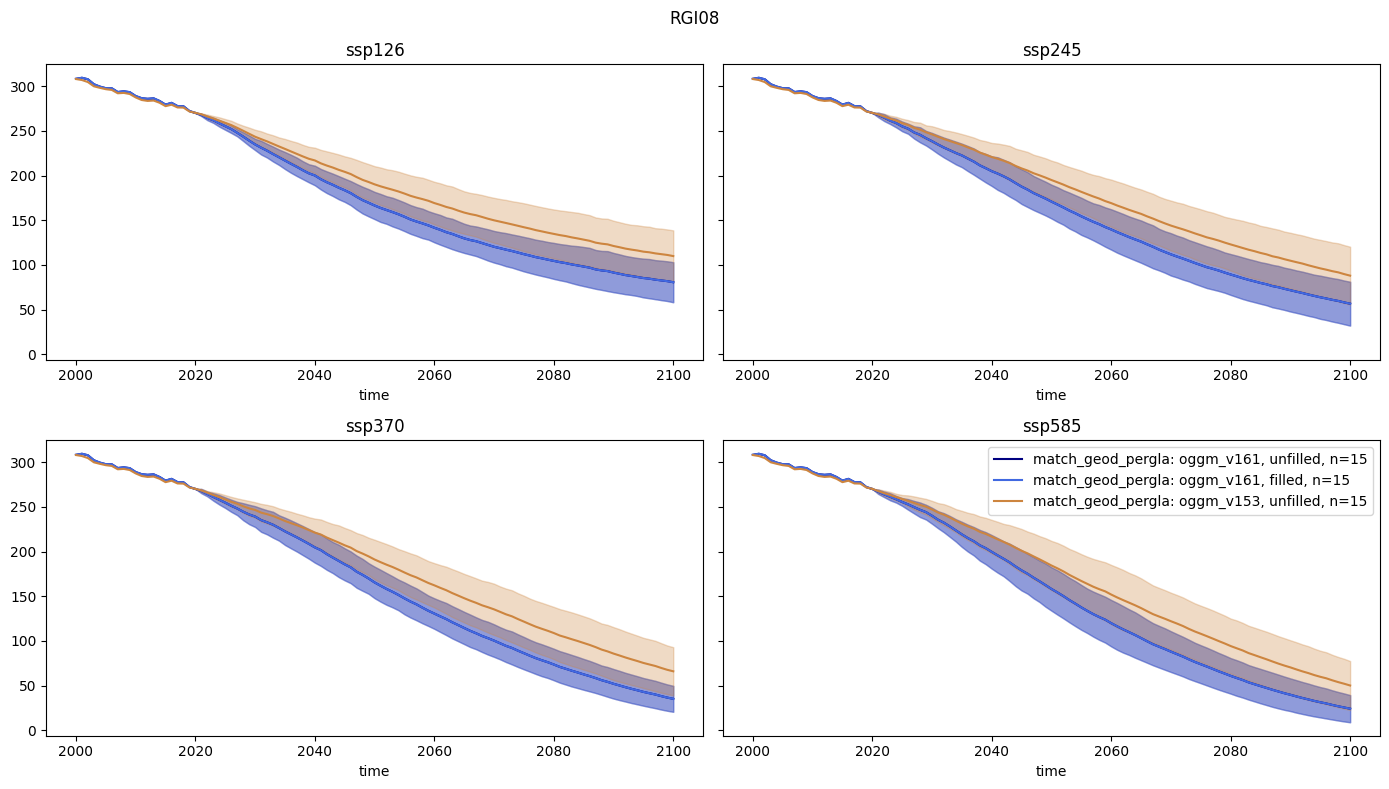

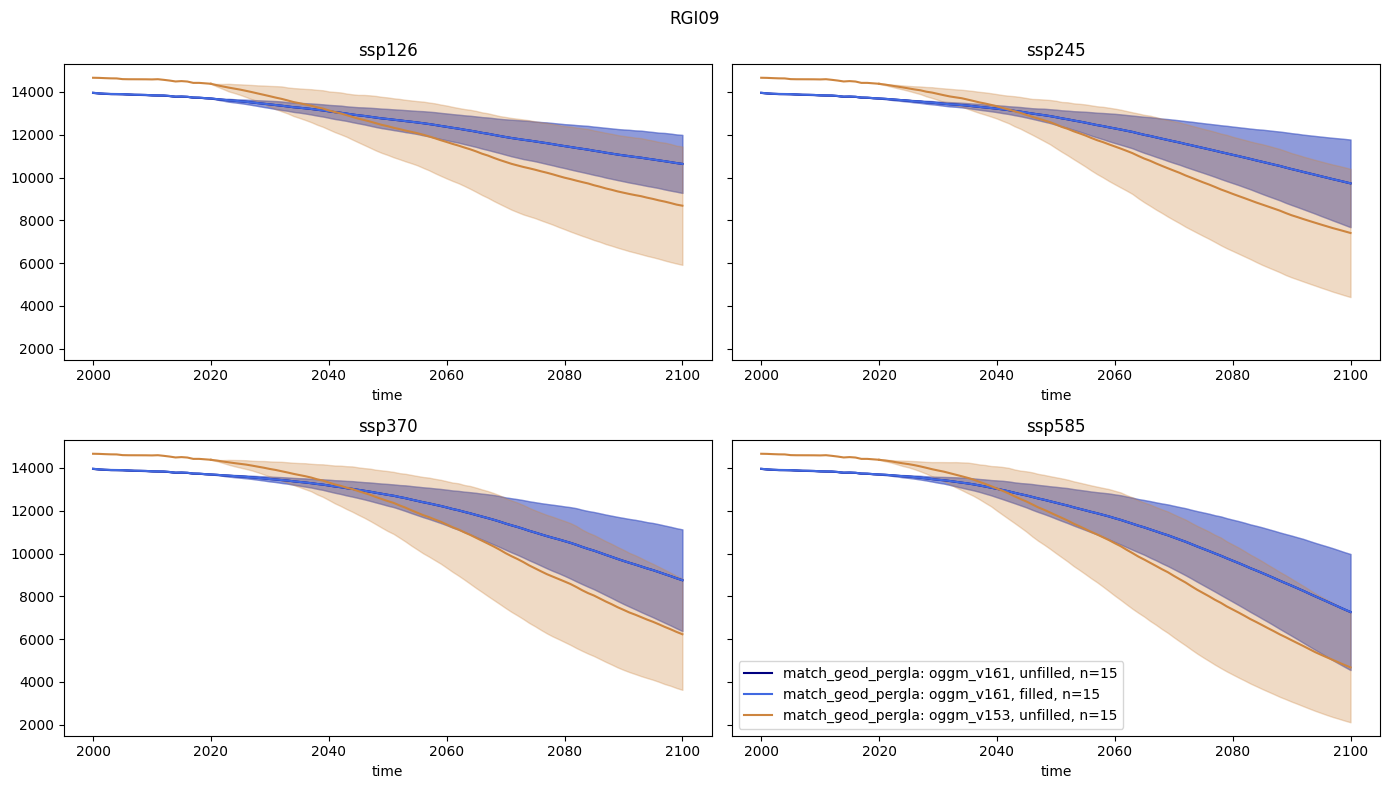

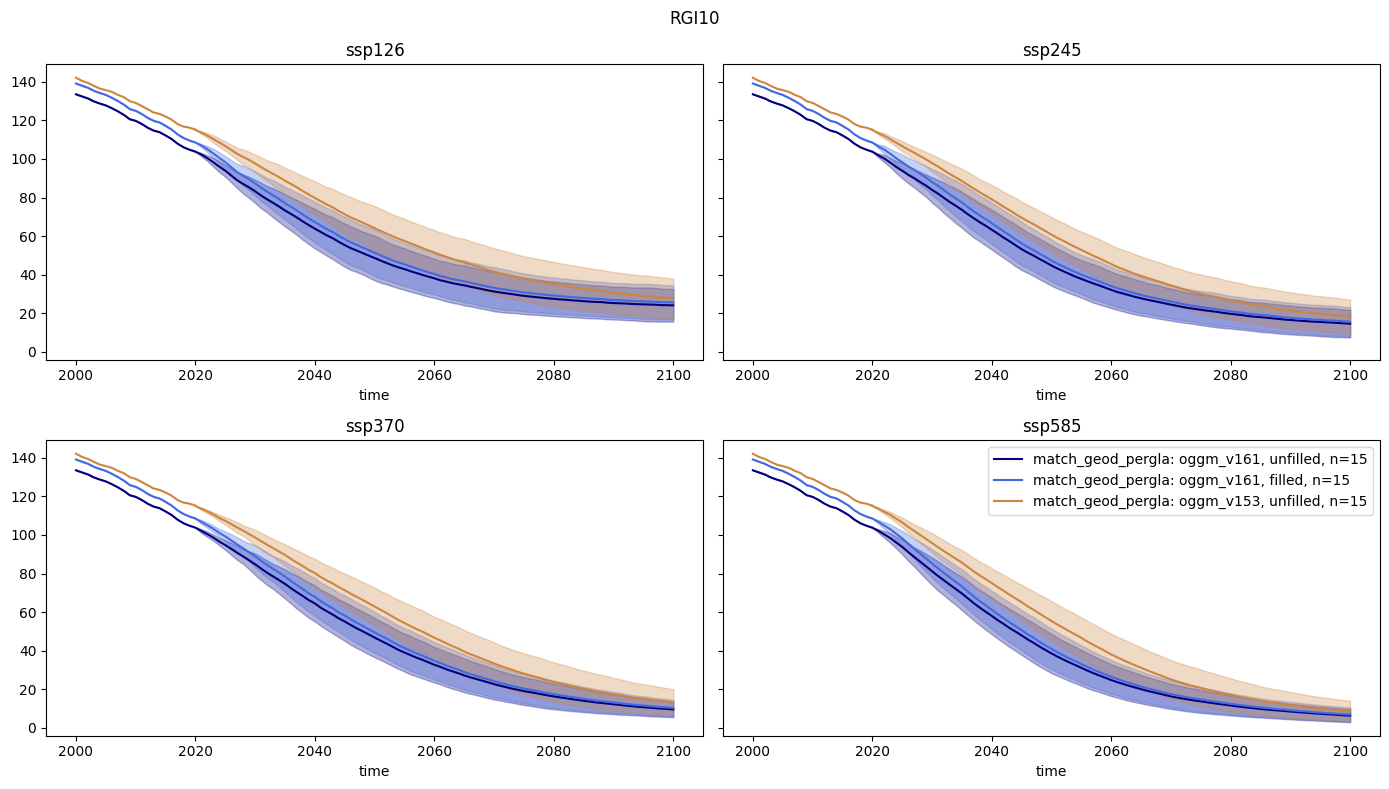

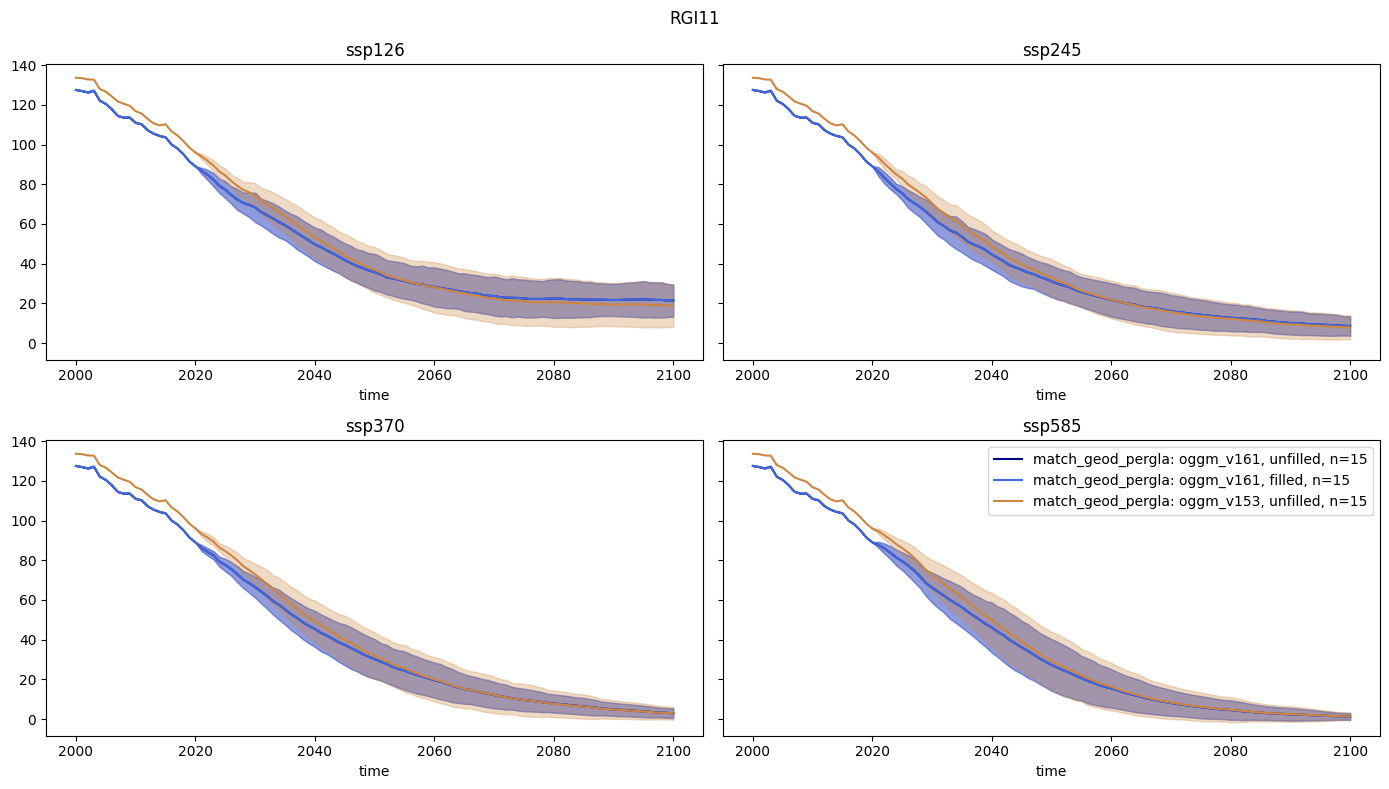

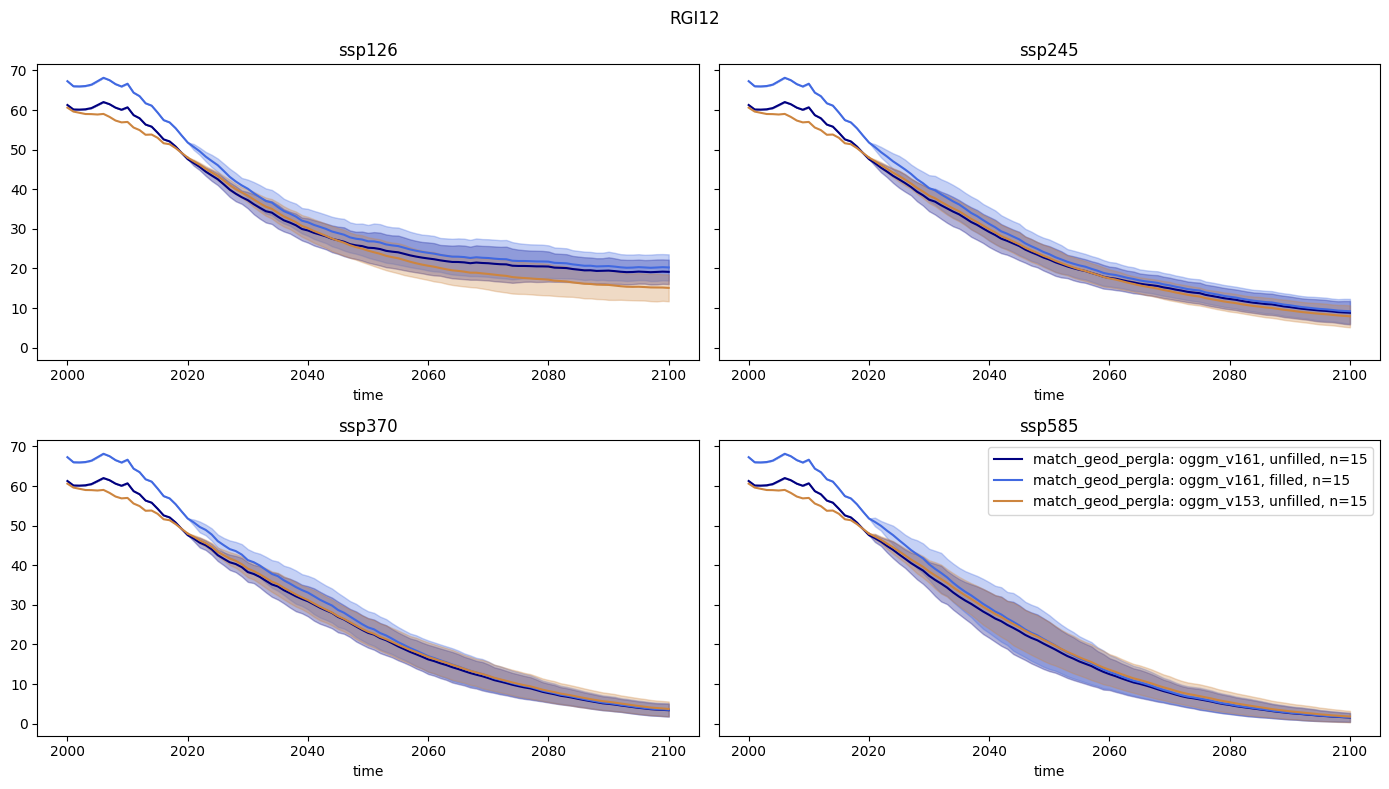

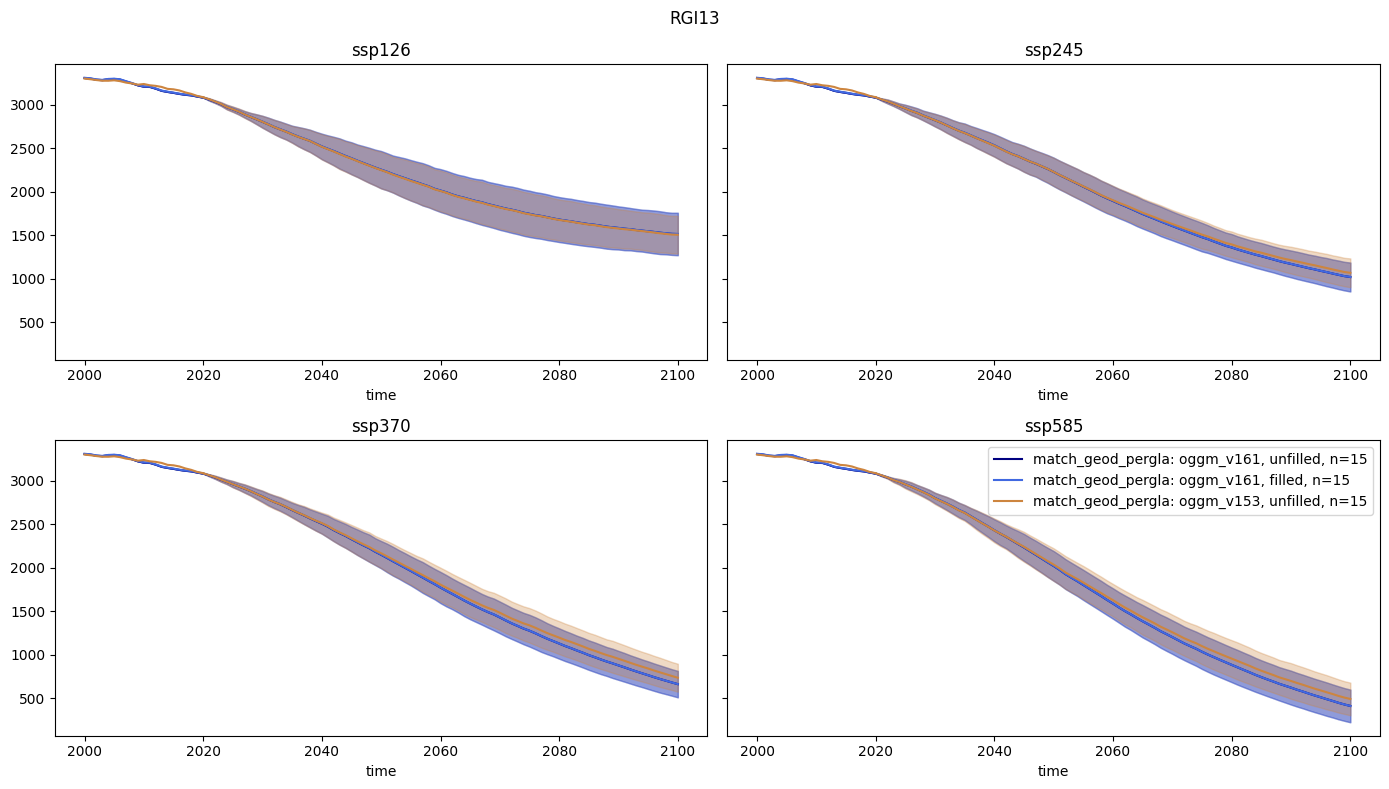

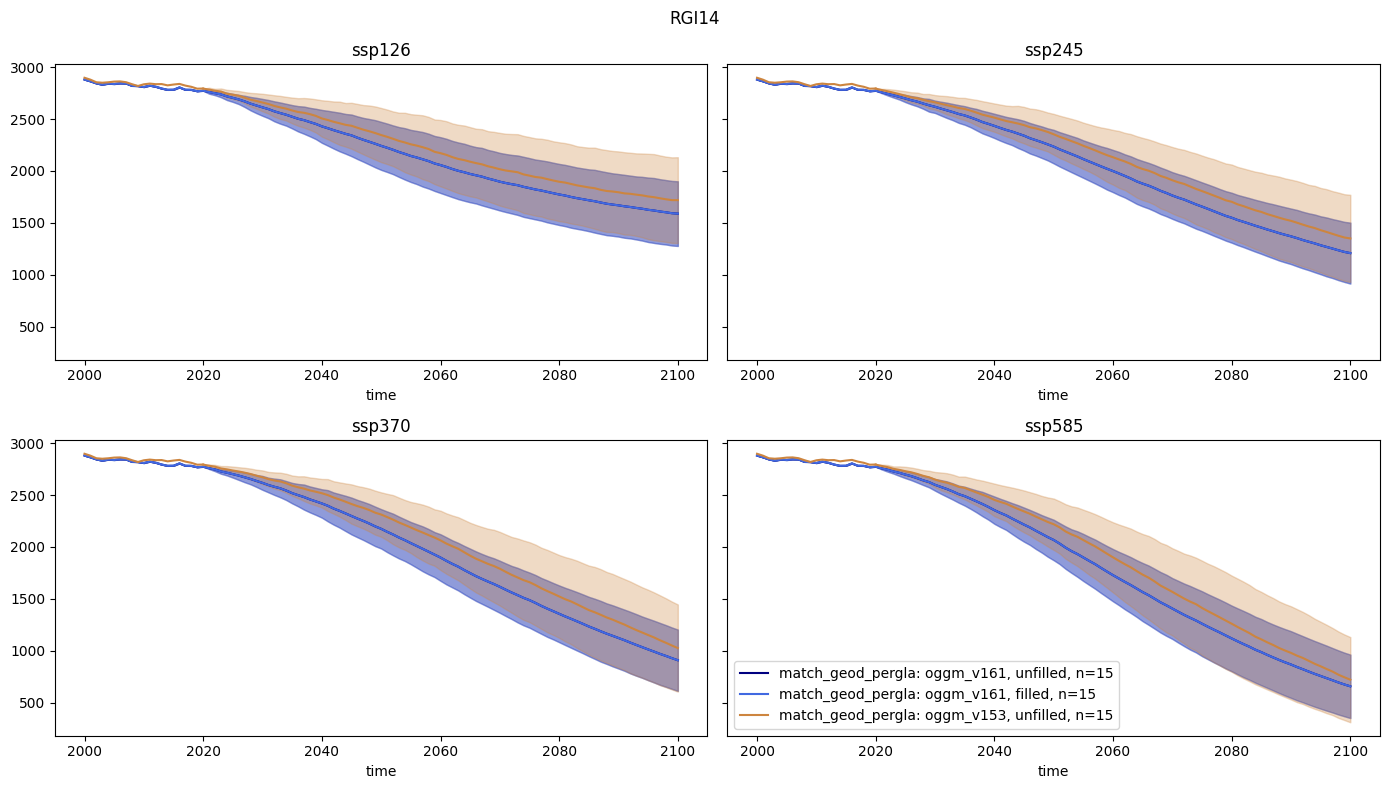

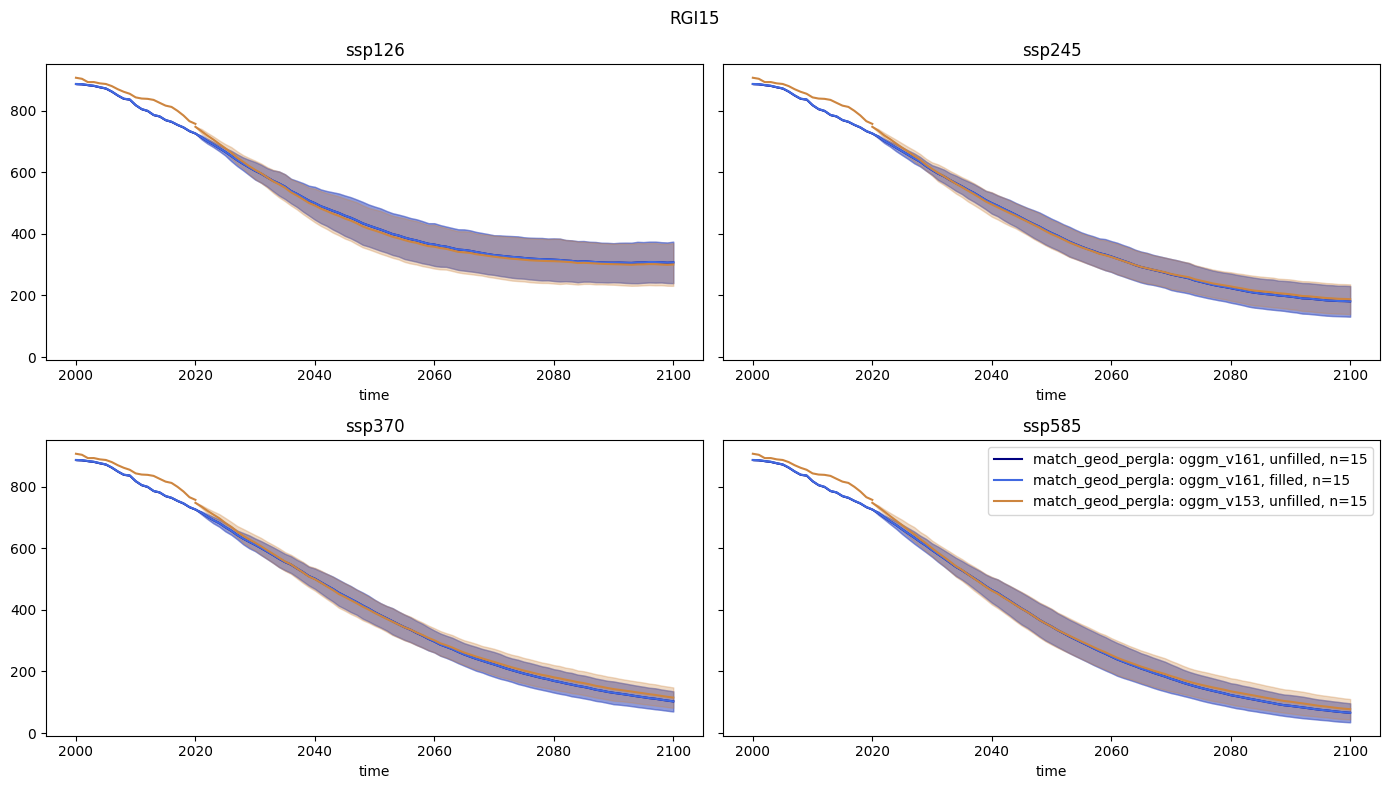

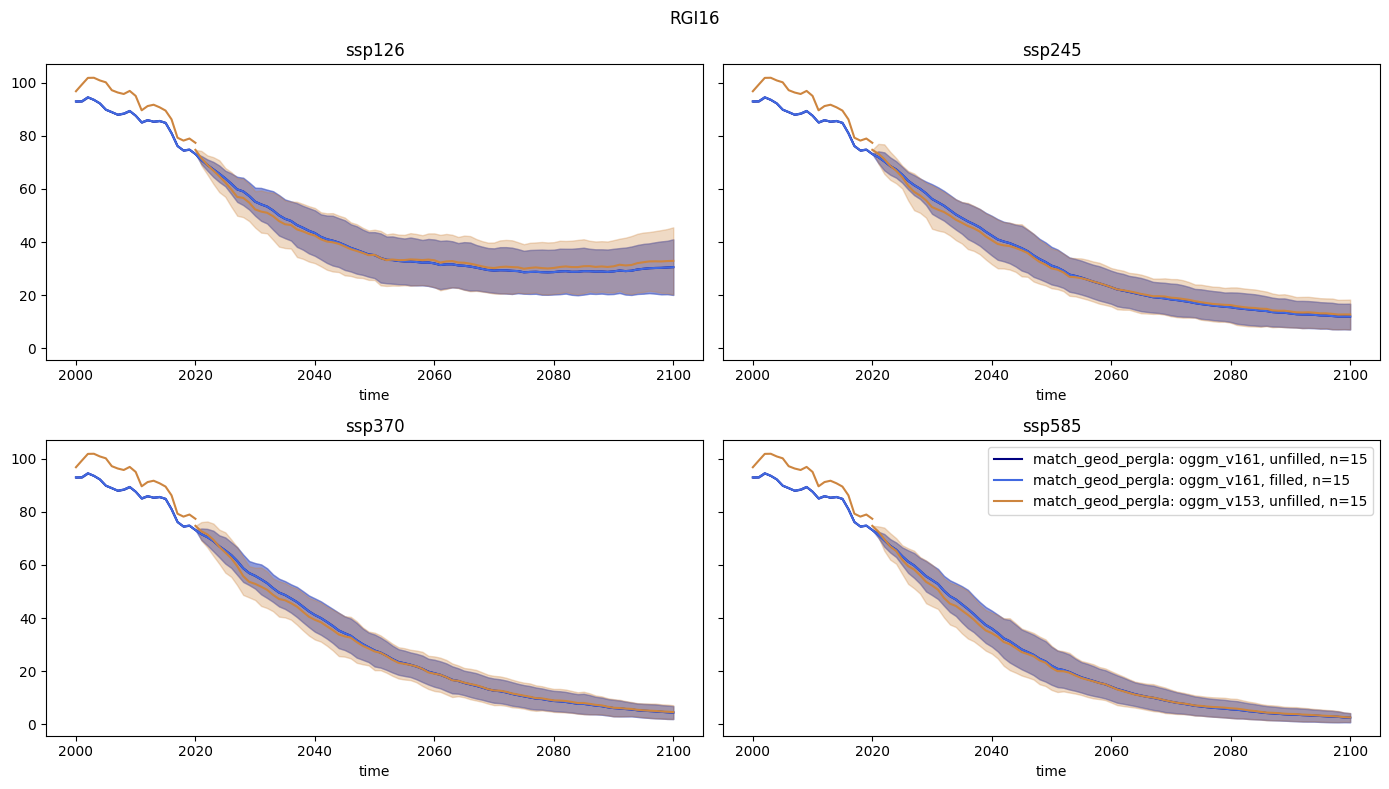

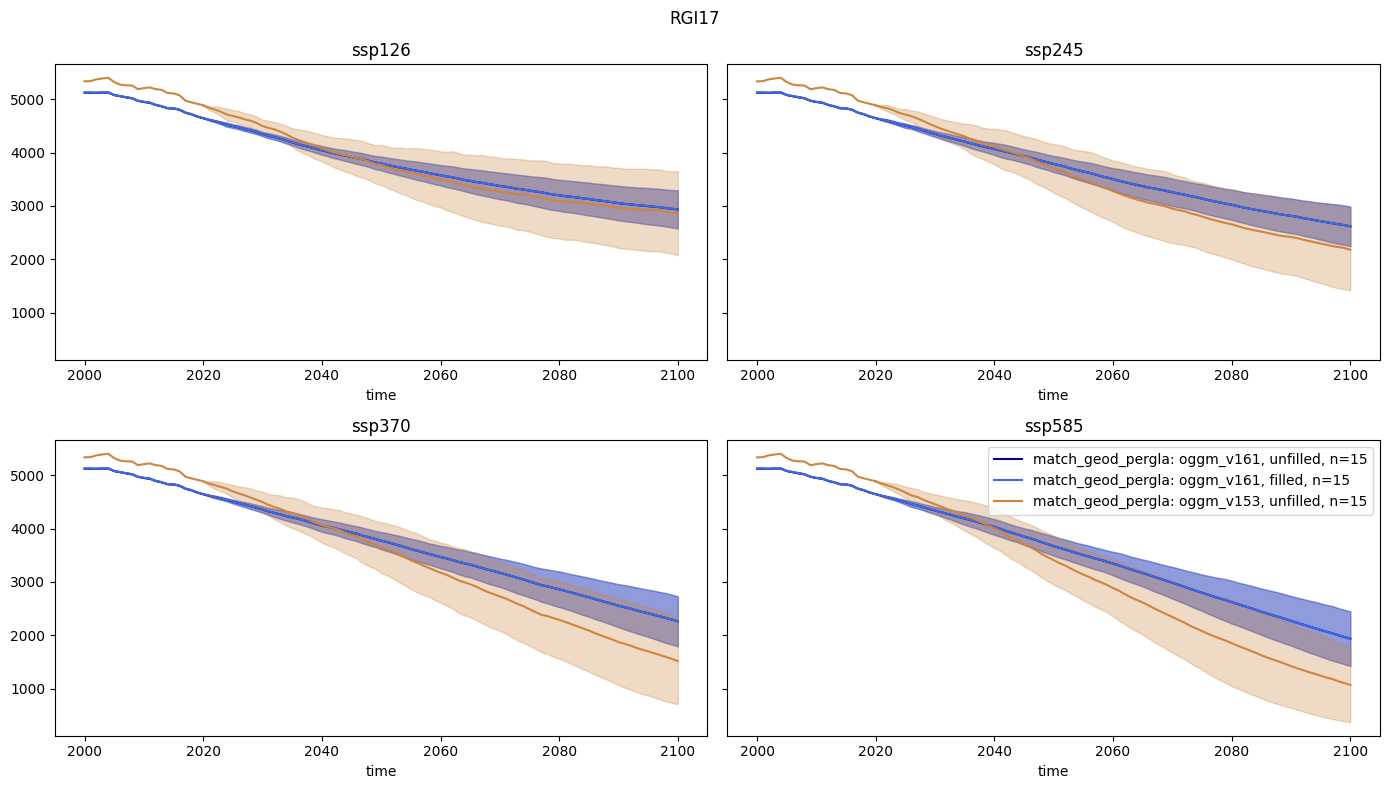

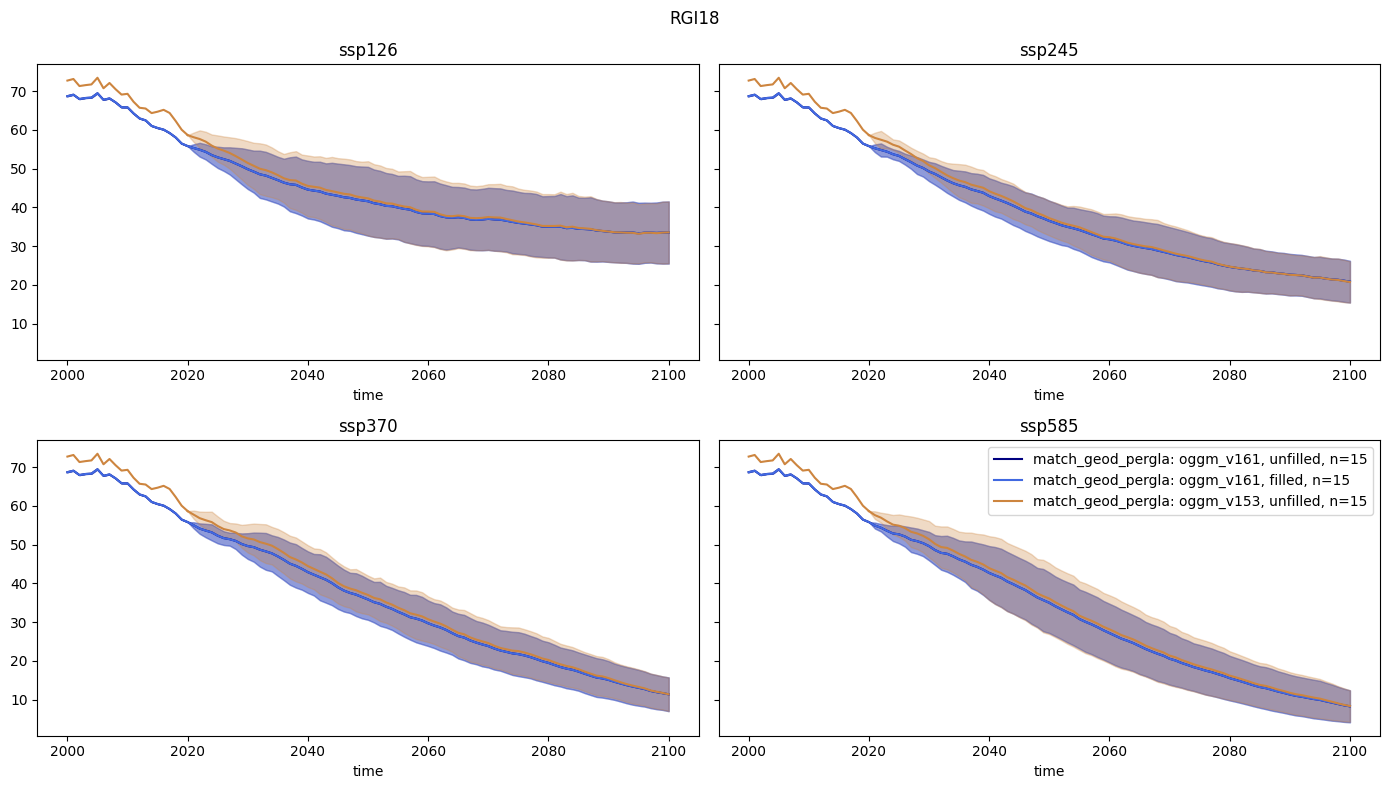

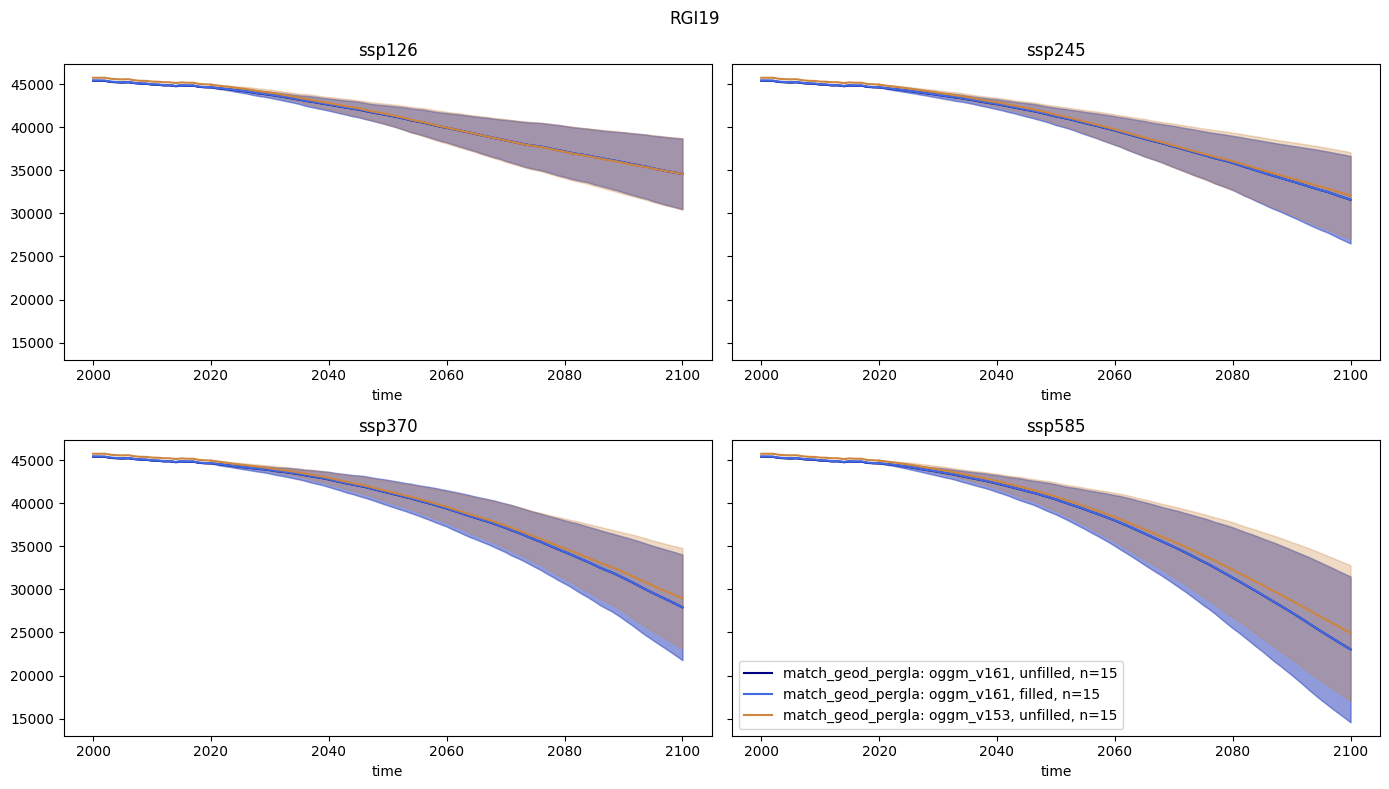

In [189]:
# plot per RGI region
for reg in sorted(df_meta.rgi_reg.unique()):
    f, axs = plt.subplots(2, 2, figsize=(14, 8), sharey=True)
    axs = np.array(axs).flatten()
    for ssp, ax in zip(sorted(df_meta.ssp.unique())[1:], axs):
        for exp, c in zip(df_meta.exp.unique(), ['navy', 'royalblue', 'peru']):
            idir = base_dir + f'volume/{exp}/{reg}/'
            df = pd.read_csv(idir + f'/{ssp}.csv', index_col=0)
            n = len(df.columns)
            avg = df.mean(axis=1) * 1e-9
            std = df.std(axis=1) * 1e-9
            ax.fill_between(avg.index, avg-std, avg+std, alpha=0.3, color=c)
            avg.plot(ax=ax, label=f'{exp}: oggm_v161, unfilled, n={n}', c=c);
            
            df = pd.read_csv(idir + f'/filled_{ssp}.csv', index_col=0)
            n_f = len(df.columns)
            avg = df.mean(axis=1) * 1e-9
            std = df.std(axis=1) * 1e-9
            ax.fill_between(avg.index, avg-std, avg+std, alpha=0.3, color='royalblue')
            avg.plot(ax=ax, label=f'{exp}: oggm_v161, filled, n={n_f}', c='royalblue');
            
            idir_oggm_v153 = f'/home/www/fmaussion/runs/runs_diff_calib_protect/agg/volume/{exp}/{reg}'
            df = pd.read_csv(idir_oggm_v153 + f'/{ssp}.csv', index_col=0)
            n_v153 = len(df.columns)
            avg = df.mean(axis=1) * 1e-9
            std = df.std(axis=1) * 1e-9
            ax.fill_between(avg.index, avg-std, avg+std, alpha=0.3, color='peru')
            avg.plot(ax=ax, label=f'{exp}: oggm_v153, unfilled, n={n_v153}', c='peru');
            
            idir_oggm_v153 = f'/home/www/fmaussion/runs/runs_diff_calib_protect/historical/agg/volume/{exp}/'
            df = pd.read_csv(idir_oggm_v153 + f'historical.csv', index_col=0)[reg].loc[2000:]
            avg = df * 1e-9
            #std = df.std(axis=1) * 1e-9
            #            x.fill_between(avg.index, avg-std, avg+std, alpha=0.3, color='peru')
            avg.plot(ax=ax, c='peru', label=f'{exp}: oggm_v153');
        ax.set_title(ssp)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:-1], labels[:-1]);
    plt.suptitle(reg)
    plt.tight_layout();